# deeptrack.holography

<a href="https://colab.research.google.com/github/DeepTrackAI/DeepTrack2/blob/develop/tutorials/3-advanced-topics/DTAT324_holography.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install deeptrack  # Uncomment if running on Colab/Kaggle.

This advanced tutorial introduces the module deeptrack.holography.

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from deeptrack import holography

## 1. Holography Module

The `holography` module provides tools for manipulating optical fields using Fourier transforms and propagation matrices. These operations are crucial for optical simulations and holographic reconstructions. In this tutorial, we will explore how to use these features and provide practical examples.

## 2. Fourier Transform

In optics, the Fourier Transform converts an optical field from the spatial domain to the frequency domain, allowing us to analyze the spatial frequencies present in the field. This transformation is fundamental for many optical systems, as it enables us to model how light propagates and interacts with lenses, apertures, or diffractive elements.

The `FourierTransform` class computes the Fourier transform of an optical field, enabling simulation of optical field propagation in the frequency domain.

First, we create a synthetic optical field with both real and imaginary parts for demonstration purposes, without aiming to represent a physically realistic field.

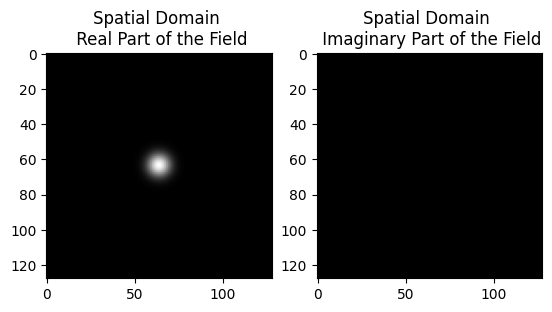

In [3]:
# Create an optical field with both real and imaginary parts.
x, y = np.meshgrid(
    np.linspace(-1, 1, 128),
    np.linspace(-1, 1, 128),
)

# Real part: A Gaussian spot.
real_part = np.exp(-(x ** 2 + y ** 2) / 0.01) 

# Imaginary part.
imaginary_part = np.zeros(x.shape)

# Combine real and imaginary parts to form a complex optical field.
field = np.zeros((128, 128, 2))
field[..., 0] = real_part  # Real part.
field[..., 1] = imaginary_part  # Imaginary part.

# Display the real part of the optical field.
plt.subplot(1, 2, 1)
plt.imshow(field[..., 0], vmin=0, vmax=1, cmap="gray")
plt.title("Spatial Domain \n Real Part of the Field")

plt.subplot(1, 2, 2)
plt.imshow(field[..., 1], vmin=0, vmax=1, cmap="gray")
plt.title("Spatial Domain \n Imaginary Part of the Field")

plt.show()

Next, we apply the Fourier transform to the optical field. This transformation moves the field from the spatial domain to the frequency domain, where we can analyze its spatial frequencies.

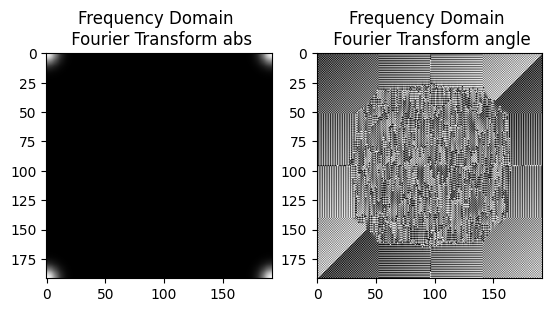

In [4]:
# Apply the Fourier Transform.
ft_op = holography.FourierTransform()
fourier_transformed_field = ft_op(field)


# Display the absolute value of the Fourier-transformed field.
plt.subplot(1, 2, 1)
plt.imshow(np.abs(fourier_transformed_field), cmap="gray")
plt.title("Frequency Domain \n Fourier Transform abs")

plt.subplot(1, 2, 2)
plt.imshow(np.angle(fourier_transformed_field), cmap="gray")
plt.title("Frequency Domain \n Fourier Transform angle")

plt.show()

Finally, we apply the inverse Fourier transform to reconstruct the optical field back into the spatial domain. This step ensures that the transformation is reversible, allowing us to verify that the original field can be recovered.

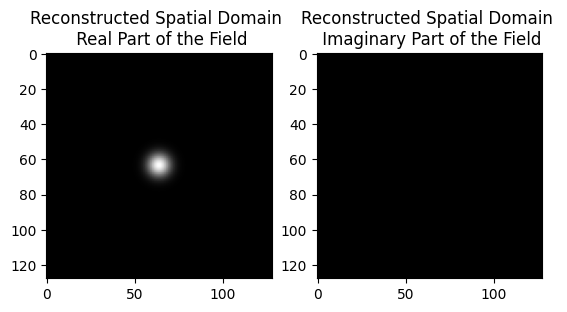

In [5]:
# Apply the Inverse Fourier Transform.
ift_op = holography.InverseFourierTransform()
reconstructed_field = ift_op(fourier_transformed_field)

# Display the real part of the reconstructed field.
plt.subplot(1, 2, 1)
plt.imshow(reconstructed_field[..., 0], vmin=0, vmax=1, cmap="gray")
plt.title("Reconstructed Spatial Domain \n Real Part of the Field")

plt.subplot(1, 2, 2)
plt.imshow(reconstructed_field[..., 1], vmin=0, vmax=1, cmap="gray")
plt.title("Reconstructed Spatial Domain \n Imaginary Part of the Field")

plt.show()

## 3. Rescale 
The `Rescale` class adjusts the amplitude of an optical field by multiplying the real and imaginary parts by a scaling factor, modifying the amplitude without affecting its structure.

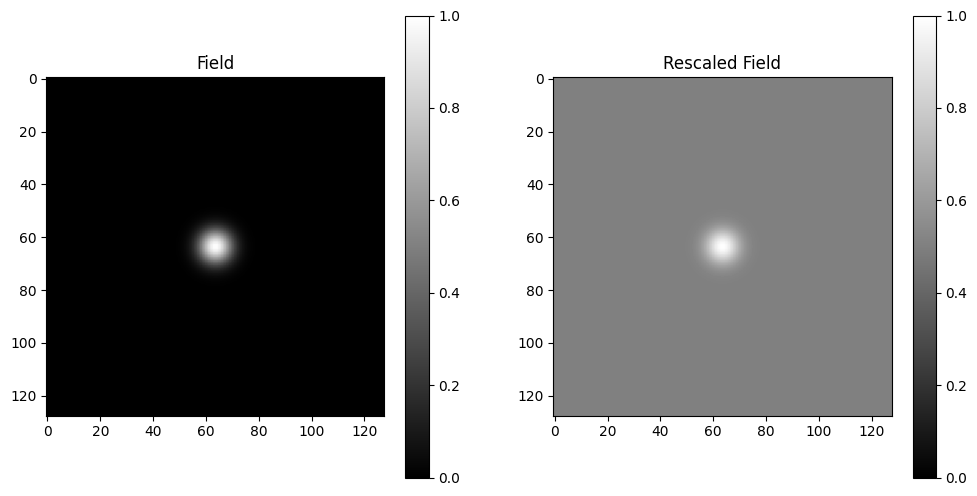

In [6]:
rescale_op = holography.Rescale(0.5)
rescaled_field = rescale_op(field)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(field[..., 0], cmap='gray', vmin=0, vmax=1)
plt.title("Field")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(rescaled_field[..., 0], cmap='gray', vmin=0, vmax=1)
plt.title("Rescaled Field")
plt.colorbar()

plt.show()

## 4. Propagation Matrix

The `get_propagation_matrix()` function computes the propagation matrix, which simulates the propagation of an optical field over a specified distance along the z-axis.